<a href="https://colab.research.google.com/github/aiSynergy37/webDevhtml5/blob/master/Classifying_movie_reviews_a_binary_classification_example_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


IMDB dataset:
a set of 50000 highly-polarized review .
25000 reviews for training and testing each.
each contains 50% negative and 50% positive reviews.



In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
#Decoding the integer sequences back into sequences

In [7]:
#word_index is a dictionary mapping words to an integer index
word_index=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
#we reverse it,mapping integer indices to words

In [0]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [0]:
#we decode the review; note that our indices were offset by 3
#because 0,1 and 2 are reserved indices for "padding", "start of sequence",and "unknown"
decode_review=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [0]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  #create an all zero matrix of ahape(len(sequences),dimension)
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1. #set specific indices of result[i]
  return results

In [0]:
#our vectorized training data
x_train=vectorize_sequences(train_data)
#our vectorized test data
x_test =vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#our vectorized labels

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

In [18]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metircs=['accuracy'])

In [0]:
from keras import optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
partial_y_train,epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.5087 - binary_accuracy: 0.7815 - val_loss: 0.3800 - val_binary_accuracy: 0.8691
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.3007 - binary_accuracy: 0.9052 - val_loss: 0.3006 - val_binary_accuracy: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2181 - binary_accuracy: 0.9278 - val_loss: 0.3084 - val_binary_accuracy: 0.8719
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1751 - binary_accuracy: 0.9436 - val_loss: 0.2842 - val_binary_accuracy: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1426 - binary_accuracy: 0.9542 - val_loss: 0.2847 - val_binary_accuracy: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1150 - bin

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

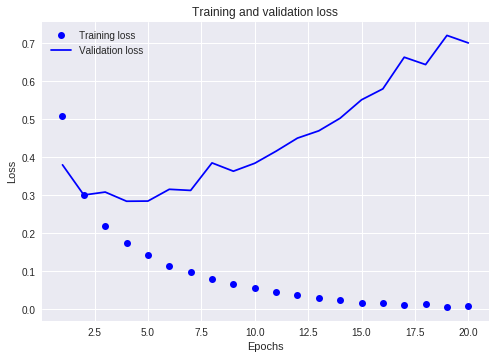

In [28]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

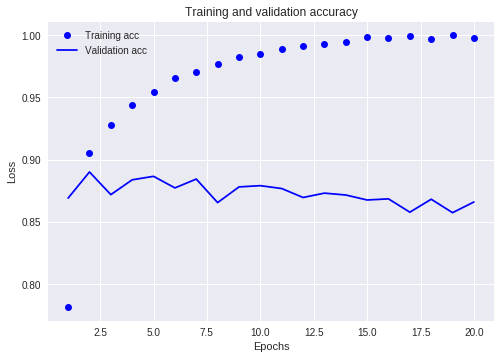

In [30]:
plt.clf() # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
#Retraining model from scratch

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4738 - acc: 0.8219
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2674 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2033 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [33]:
results

[0.3114779526901245, 0.876]

In [34]:
model.predict(x_test)

array([[0.16203958],
       [0.9998488 ],
       [0.3965716 ],
       ...,
       [0.08135867],
       [0.05013838],
       [0.45712557]], dtype=float32)